In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

In [3]:
conn_str = f"postgresql://{postgres_user}:{postgres_pw}@{postgres_host}:{postgres_port}/{postgres_db}"

query = """
SELECT *
FROM heartdisease
"""

df = pd.read_sql_query(query, con=conn_str)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
# Define the features and the outcome
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by `?`) with a `0`
X = X.replace(to_replace='?', value=0)

# Binarize y so that `1` means heart disease diagnosis and `0` means no diagnosis
y = np.where(y > 0, 0, 1)

In [6]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

1. Produce dendrograms for the heart disease dataset. Use three different linkage methods: complete, average, and ward. Which linkage method do you think produces the most reasonable result?
2. Apply agglomerative clustering to the heart disease data by setting n_clusters=2. Try the three linkage methods above, and get ARI and silhouette scores for each of your solutions. Compare the results with each other. Then compare the results with the results from the k-means solution that you implemented in the previous checkpoint's assignment. Which algorithm and setting perform better?

In [17]:
# Defining the agglomerative clustering using complete linkage
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='euclidean',
                                      n_clusters=3)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

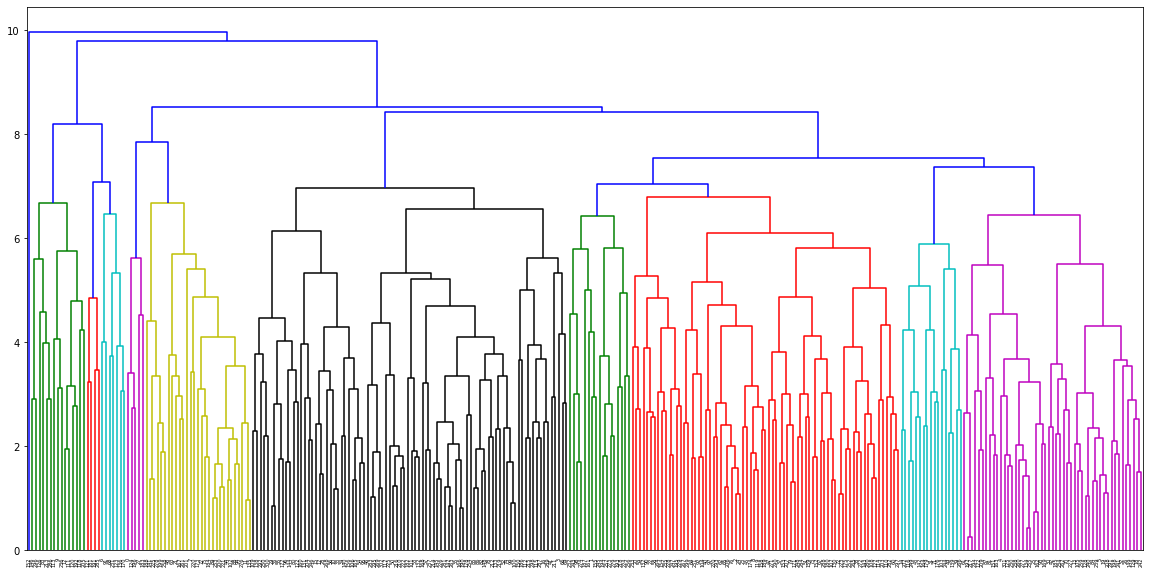

In [18]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='complete'))
plt.show()

In [19]:
print("Adjusted Rand Index of the Agglomerative Clustering Complete Linkage: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhoutte score of the Agglomerative Clustering Complete Linkage: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the Agglomerative Clustering Complete Linkage: 0.0570632004896936
The silhoutte score of the Agglomerative Clustering Complete Linkage: 0.17352688119251744


In [20]:
# Defining the agglomerative clustering using average linkage
agg_cluster = AgglomerativeClustering(linkage='average', 
                                      affinity='euclidean',
                                      n_clusters=3)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

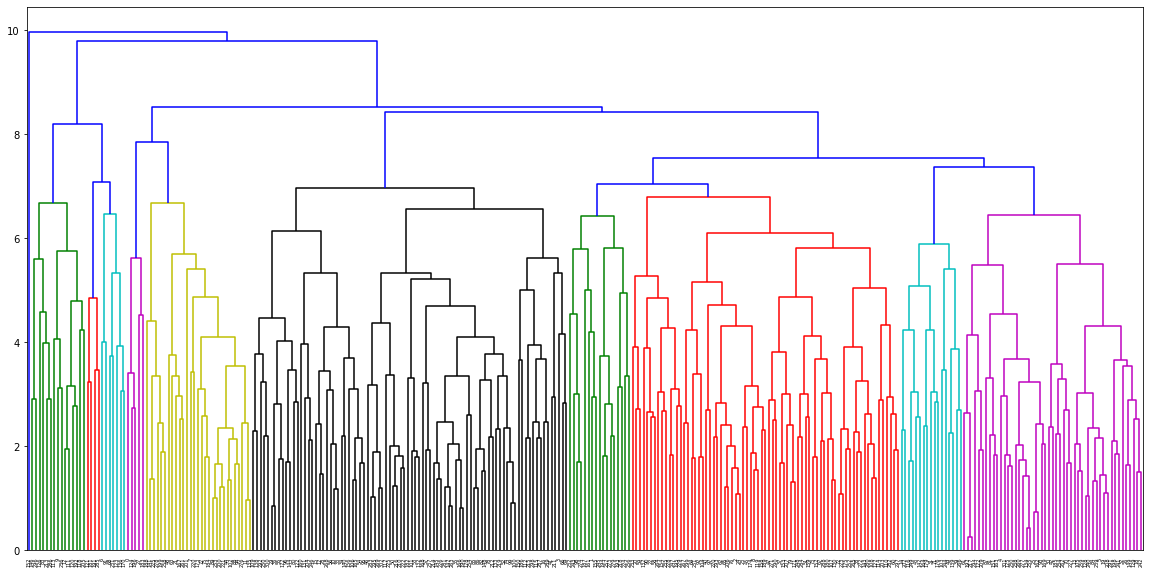

In [21]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='complete'))
plt.show()

In [22]:
print("Adjusted Rand Index of the Agglomerative Clustering Average Linkage: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhoutte score of the Agglomerative Clustering Average Linkage: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the Agglomerative Clustering Average Linkage: -0.001876334814197677
The silhoutte score of the Agglomerative Clustering Average Linkage: 0.22965520091868616


In [14]:
# Defining the agglomerative clustering using ward linkage
agg_cluster = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=3)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

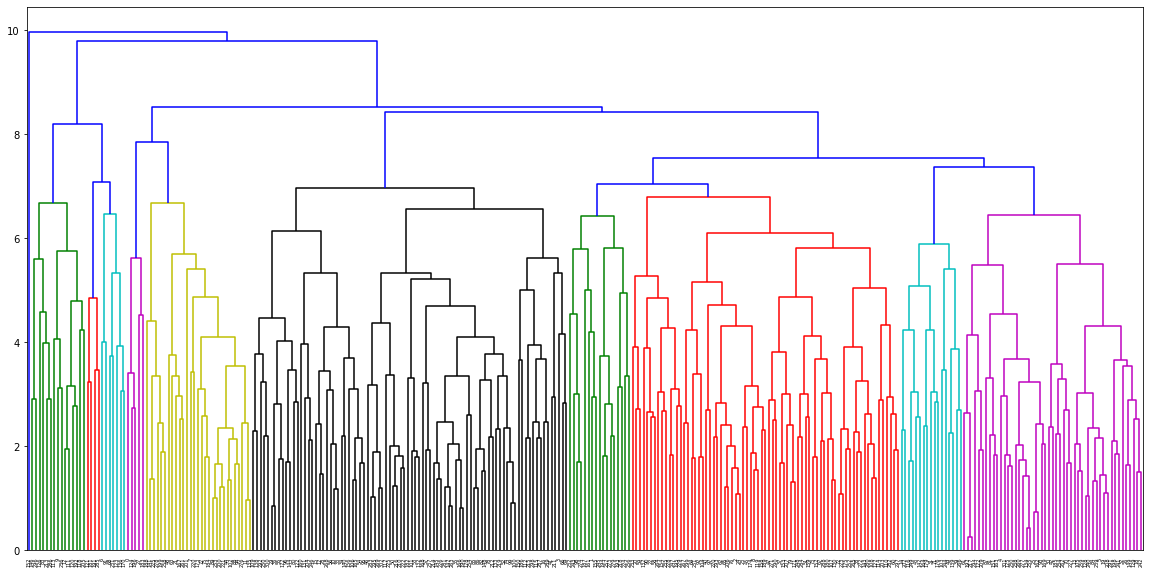

In [15]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='complete'))
plt.show()

In [16]:
print("Adjusted Rand Index of the Agglomerative Clustering Ward Linkage: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhoutte score of the Agglomerative Clustering Ward Linkage: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the Agglomerative Clustering Ward Linkage: 0.14859596899025246
The silhoutte score of the Agglomerative Clustering Ward Linkage: 0.15524038244526203


### Using all three linkages, ward, average and complete, produces no noticeable effect in the dendograms but using ward linkage returns better RI and ARI scores. 

In [23]:
# Defining the agglomerative clustering using ward linkage with 2 clusters
agg_cluster = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=2)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

In [24]:
print("Adjusted Rand Index of the Agglomerative Clustering Ward Linkage: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhoutte score of the Agglomerative Clustering Ward Linkage: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the Agglomerative Clustering Ward Linkage: 0.146129913123814
The silhoutte score of the Agglomerative Clustering Ward Linkage: 0.1387197366557222


In [25]:
# Defining the agglomerative clustering using average linkage with 2 clusters
agg_cluster = AgglomerativeClustering(linkage='average', 
                                      affinity='euclidean',
                                      n_clusters=2)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

In [26]:
print("Adjusted Rand Index of the Agglomerative Clustering Average Linkage: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhoutte score of the Agglomerative Clustering Average Linkage: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the Agglomerative Clustering Average Linkage: -0.0010061512759301477
The silhoutte score of the Agglomerative Clustering Average Linkage: 0.34836188921330785


In [27]:
# Defining the agglomerative clustering using compelte linkage with 2 clusters
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='euclidean',
                                      n_clusters=2)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

In [28]:
print("Adjusted Rand Index of the Agglomerative Clustering Complete Linkage: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhoutte score of the Agglomerative Clustering Complete Linkage: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the Agglomerative Clustering Complete Linkage: -0.0010061512759301477
The silhoutte score of the Agglomerative Clustering Complete Linkage: 0.34836188921330785


Using 2 clusters, it appears that ward linkage is best if we know our target variable should have two clusters. Here, I think we should have two clusters, one for heart disease and another for those without. However, it also has the lowest adjusted RI so now I'm not sure whether it's the best. Over all it does seem that using 3 clusters returns better results. 

Comparing these findings to k-means, using 2 clusters returns far better adjusted RI. The silhouette scores for 2 clusters using k-means and agglomerative clustering is more mixed but overall average and complete linkage using hierarchical clustering returns better silhouette scores making them better. 